In [16]:
# Este notebook demonstra como usar o pipeline automatizado de pré-processamento

# 1. Importações

import sys
from pathlib import Path
import pandas as pd
import numpy as np

# Adicionar src ao path
sys.path.append(str(Path.cwd().parent / 'src' / 'utils'))

from load_data import carregar_dados_inmet
from preprocess import (
    WeatherPreprocessor, 
    DataCleaner, 
    DateTimeTransformer, 
    FeatureEngineer
)

In [ ]:
# 2. Carregar Dados Brutos

# Carregar múltiplos arquivos
data_dir = Path("../data")
arquivos_inmet = []
for pattern in ["*INMET*.CSV", "*INMET*.csv", "*inmet*.CSV", "*inmet*.csv"]:
    arquivos_inmet.extend(data_dir.glob(pattern))

arquivos_inmet = list(set(arquivos_inmet))
arquivos_inmet.sort()

print(f"📁 Arquivos encontrados: {len(arquivos_inmet)}")

# Carregar e concatenar
dfs = []
for arquivo in arquivos_inmet:
    try:
        df_temp = carregar_dados_inmet(str(arquivo))
        dfs.append(df_temp)
        print(f"   ✅ {arquivo.name}: {len(df_temp)} registros")
    except Exception as e:
        print(f"   ❌ Erro: {str(e)[:100]}")

df_raw = pd.concat(dfs, ignore_index=True)
print(f"\n📊 Dataset bruto: {len(df_raw)} registros × {len(df_raw.columns)} colunas")

📁 Arquivos encontrados: 3
   ✅ dados_inmet_2022.CSV: 8760 registros
   ✅ dados_inmet_2023.CSV: 8760 registros
   ✅ dados_inmet_2024.CSV: 8784 registros

📊 Dataset bruto: 26304 registros × 20 colunas


In [6]:
# 3. Pipeline Completo (Uso Simples)

# Criar preprocessor
preprocessor = WeatherPreprocessor(verbose=True)

# Executar pipeline completo
df_processed = preprocessor.fit_transform(df_raw)

# Visualizar resultado
print("\n📊 Primeiras 5 linhas do dataset processado:")
df_processed.head()


🚀 INICIANDO PIPELINE DE PRÉ-PROCESSAMENTO
🔧 Convertendo colunas para formato numérico...
   ✅ 19 colunas convertidas com sucesso
🧹 Removendo valores inválidos...
   ✅ Valores infinitos substituídos por NaN
   ✅ 36 outliers extremos removidos
💉 Tratando valores nulos (método: interpolate)...
   ✅ 15767 valores nulos tratados
📅 Criando coluna datetime unificada...
   ✅ Coluna 'datetime' criada com sucesso
   ✅ Dados ordenados por timestamp

🎯 Variável target 'Chuva' criada: 6.05% de eventos
🕐 Criando features temporais...
   ✅ 12 features temporais criadas
🌡️ Criando features meteorológicas...
   ✅ 5 features meteorológicas criadas

✅ PRÉ-PROCESSAMENTO CONCLUÍDO
📊 Registros finais: 26304
📊 Features totais: 41

📊 Primeiras 5 linhas do dataset processado:


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,mes_sin,mes_cos,estacao,periodo_dia,fim_semana,amplitude_termica,spread_temp_orvalho,variacao_umidade,indice_desconforto,radiacao_norm
0,2022/01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,primavera,madrugada,0,NaN,NaN,NaN,NaN,NaN
1,2022/01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,primavera,madrugada,0,NaN,NaN,NaN,NaN,NaN
2,2022/01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,primavera,madrugada,0,NaN,NaN,NaN,NaN,NaN
3,2022/01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,primavera,madrugada,0,NaN,NaN,NaN,NaN,NaN
4,2022/01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,primavera,madrugada,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 4. Pipeline com Features Avançadas

# Processar com lag e rolling features
print("\n🚀 Processando com features avançadas...\n")

df_processed_advanced = preprocessor.fit_transform(
    df_raw,
    criar_lags=True,      # Criar features de lag (1h, 3h, 6h atrás)
    criar_rolling=True    # Criar médias móveis (3h, 6h, 12h)
)

print("\n📊 Comparação de dimensões:")
print(f"   Dataset básico: {df_processed.shape}")
print(f"   Dataset avançado: {df_processed_advanced.shape}")


🚀 Processando com features avançadas...

🚀 INICIANDO PIPELINE DE PRÉ-PROCESSAMENTO
🔧 Convertendo colunas para formato numérico...
   ✅ 19 colunas convertidas com sucesso
🧹 Removendo valores inválidos...
   ✅ Valores infinitos substituídos por NaN
   ✅ 36 outliers extremos removidos
💉 Tratando valores nulos (método: interpolate)...
   ✅ 15767 valores nulos tratados
📅 Criando coluna datetime unificada...
   ✅ Coluna 'datetime' criada com sucesso
   ✅ Dados ordenados por timestamp

🎯 Variável target 'Chuva' criada: 6.05% de eventos
🕐 Criando features temporais...
   ✅ 12 features temporais criadas
🌡️ Criando features meteorológicas...
   ✅ 5 features meteorológicas criadas
⏮️ Criando lag features (lags: [1, 3, 6])...
   ✅ 9 lag features criadas
📊 Criando rolling features (windows: [3, 6, 12])...
   ✅ 12 rolling features criadas

🧹 26304 linhas removidas devido a NaN de lag/rolling

✅ PRÉ-PROCESSAMENTO CONCLUÍDO
📊 Registros finais: 0
📊 Features totais: 62

📊 Comparação de dimensões:
   Da

In [ ]:
# 5. Uso Modular (Passo a Passo)

print("=" * 80)
print("🔧 EXEMPLO DE USO MODULAR")
print("=" * 80)

# Inicializar componentes separadamente
cleaner = DataCleaner(verbose=True)
dt_transformer = DateTimeTransformer(verbose=True)
feat_engineer = FeatureEngineer(verbose=True)

# 1. Limpeza
df_step1 = cleaner.converter_para_numerico(df_raw)
print()

# 2. Remover inválidos
df_step2 = cleaner.remover_valores_invalidos(df_step1)
print()

# 3. Tratar nulos
df_step3 = cleaner.tratar_valores_nulos(df_step2, metodo='interpolate')
print()

# 4. Criar datetime
df_step4 = dt_transformer.criar_datetime(df_step3)
print()

# 5. Features temporais
df_step5 = feat_engineer.criar_features_temporais(df_step4)
print()

# 6. Features meteorológicas
df_step6 = feat_engineer.criar_features_meteorologicas(df_step5)

print("\n✅ Pipeline modular concluído!")

🔧 EXEMPLO DE USO MODULAR
🔧 Convertendo colunas para formato numérico...
   ✅ 19 colunas convertidas com sucesso

🧹 Removendo valores inválidos...
   ✅ Valores infinitos substituídos por NaN
   ✅ 36 outliers extremos removidos

💉 Tratando valores nulos (método: interpolate)...
   ✅ 15767 valores nulos tratados

📅 Criando coluna datetime unificada...
   ✅ Coluna 'datetime' criada com sucesso
   ✅ Dados ordenados por timestamp

🕐 Criando features temporais...
   ✅ 12 features temporais criadas

🌡️ Criando features meteorológicas...
   ✅ 5 features meteorológicas criadas

✅ Pipeline modular concluído!


In [10]:
# 6. Análise das Features Criadas

# Identificar novas features criadas
features_originais = set(df_raw.columns)
features_novas = set(df_processed.columns) - features_originais

print(f"📊 Total de features criadas: {len(features_novas)}\n")

# Categorizar features
features_temporais = [f for f in features_novas if any(x in f.lower() for x in ['ano', 'mes', 'dia', 'hora', 'semana', 'periodo', 'estacao', 'sin', 'cos'])]
features_meteorologicas = [f for f in features_novas if any(x in f.lower() for x in ['amplitude', 'spread', 'variacao', 'indice', 'radiacao_norm'])]
features_outras = list(features_novas - set(features_temporais) - set(features_meteorologicas))

print("🕐 Features Temporais:")
for f in sorted(features_temporais):
    print(f"   - {f}")

print("\n🌡️ Features Meteorológicas:")
for f in sorted(features_meteorologicas):
    print(f"   - {f}")

if features_outras:
    print("\n📊 Outras Features:")
    for f in sorted(features_outras):
        print(f"   - {f}")

📊 Total de features criadas: 21

🕐 Features Temporais:
   - ano
   - dia
   - dia_ano
   - dia_semana
   - estacao
   - fim_semana
   - hora
   - hora_cos
   - hora_sin
   - mes
   - mes_cos
   - mes_sin
   - periodo_dia
   - radiacao_norm
   - semana_ano

🌡️ Features Meteorológicas:
   - amplitude_termica
   - indice_desconforto
   - radiacao_norm
   - spread_temp_orvalho
   - variacao_umidade

📊 Outras Features:
   - Chuva
   - datetime


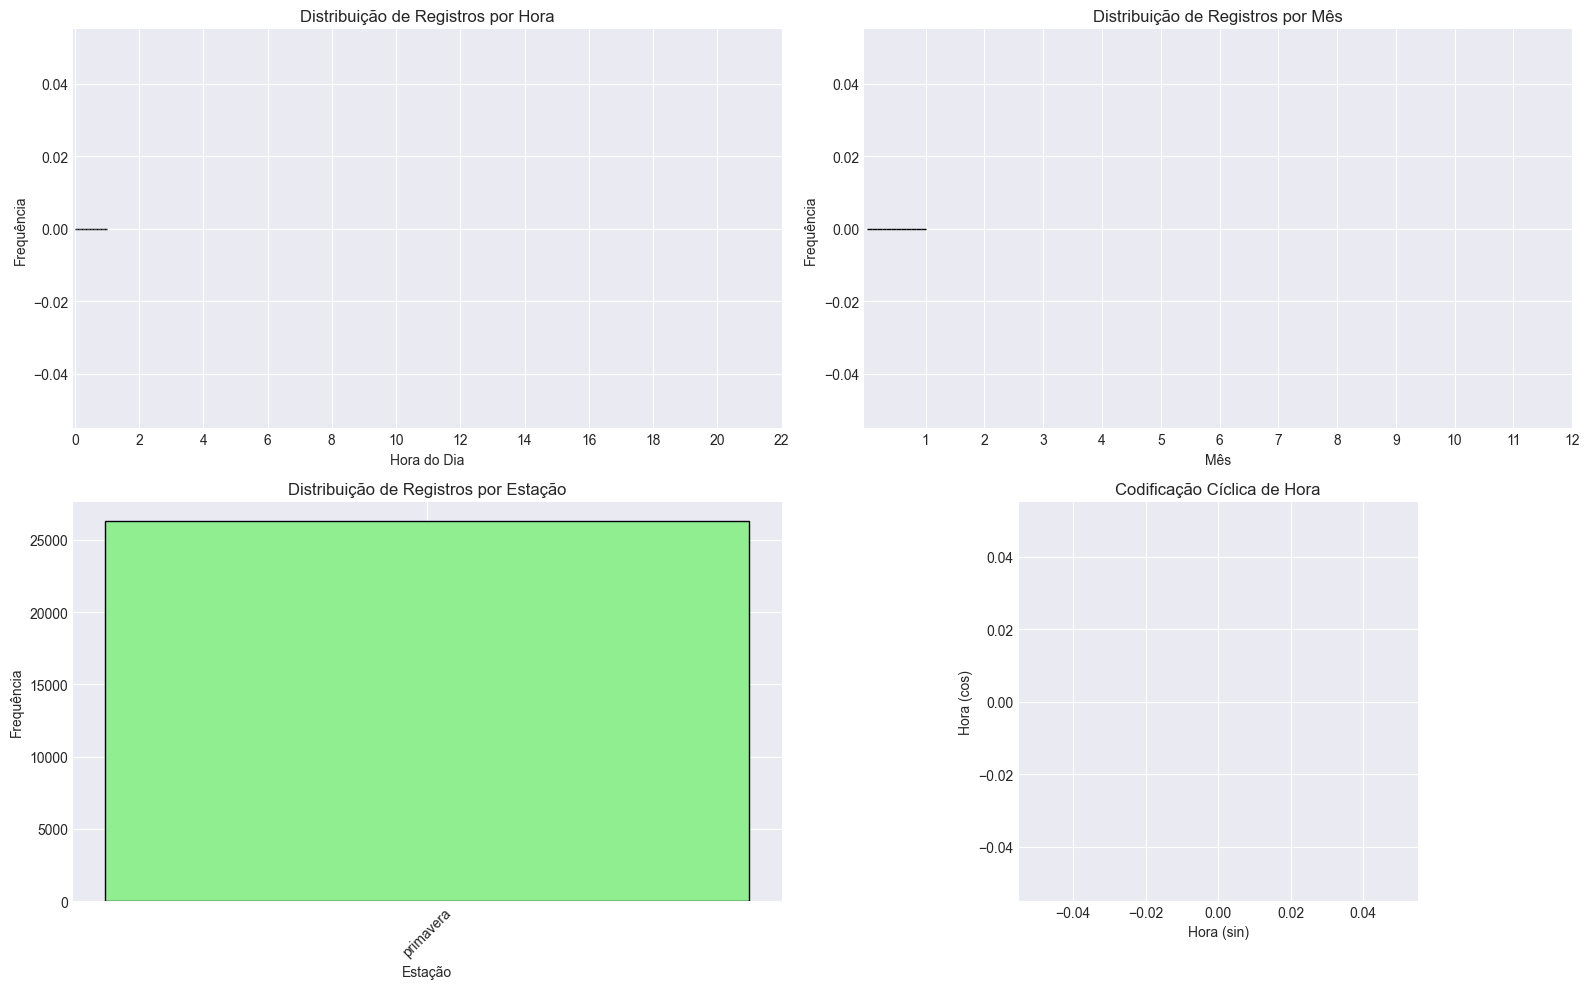

In [ ]:
# 7. Visualizar Features Temporais

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Selecionar amostra para visualização
sample = df_processed.sample(min(5000, len(df_processed)))

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Distribuição por hora do dia

axes[0, 0].hist(df_processed['hora'].dropna(), bins=24, color='steelblue', edgecolor='black') # <-- CORREÇÃO
axes[0, 0].set_xlabel('Hora do Dia')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Distribuição de Registros por Hora')
axes[0, 0].set_xticks(range(0, 24, 2))

# 2. Distribuição por mês

axes[0, 1].hist(df_processed['mes'].dropna(), bins=12, color='coral', edgecolor='black') # <-- CORREÇÃO
axes[0, 1].set_xlabel('Mês')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição de Registros por Mês')
axes[0, 1].set_xticks(range(1, 13))

# 3. Distribuição por estação

estacao_counts = df_processed['estacao'].value_counts()
axes[1, 0].bar(estacao_counts.index, estacao_counts.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Estação')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Distribuição de Registros por Estação')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Features cíclicas (hora)
# Criar uma amostra limpa sem NaNs para as colunas do scatter plot
sample_plot4 = sample.dropna(subset=['hora_sin', 'hora_cos', 'hora']) 
axes[1, 1].scatter(sample_plot4['hora_sin'], sample_plot4['hora_cos'], 
                   c=sample_plot4['hora'], cmap='twilight', alpha=0.6, s=10) 
axes[1, 1].set_xlabel('Hora (sin)')
axes[1, 1].set_ylabel('Hora (cos)')
axes[1, 1].set_title('Codificação Cíclica de Hora')
axes[1, 1].set_aspect('equal')

plt.tight_layout()
plt.show()

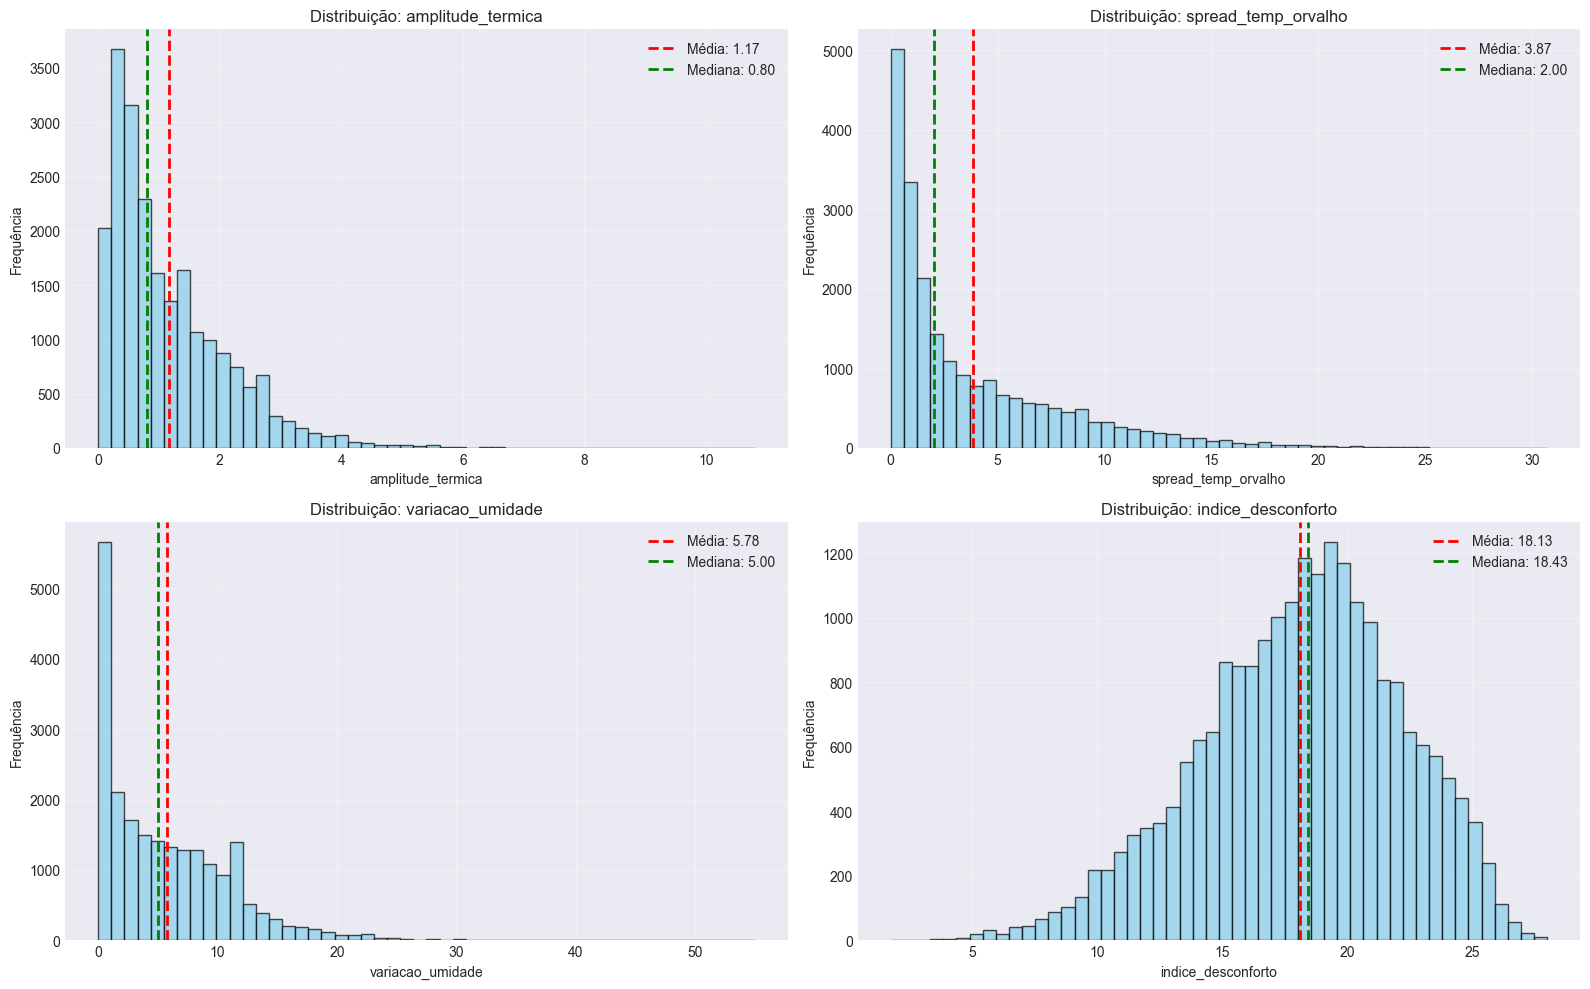

In [13]:
# 8. Visualizar Features Meteorológicas

# Identificar features meteorológicas disponíveis
features_meteo_disponiveis = [f for f in df_processed.columns 
                             if any(x in f for x in ['amplitude', 'spread', 'variacao', 'indice'])]

if features_meteo_disponiveis:
    n_features = len(features_meteo_disponiveis)
    n_cols = 2
    n_rows = (n_features + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    axes = axes.flatten() if n_features > 1 else [axes]
    
    for i, feature in enumerate(features_meteo_disponiveis):
        ax = axes[i]
        
        # Histograma da feature
        data = df_processed[feature].dropna()
        ax.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequência')
        ax.set_title(f'Distribuição: {feature}')
        ax.grid(True, alpha=0.3)
        
        # Adicionar estatísticas
        mean_val = data.mean()
        median_val = data.median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
        ax.legend()
    
    # Remover subplots vazios
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Nenhuma feature meteorológica derivada encontrada")

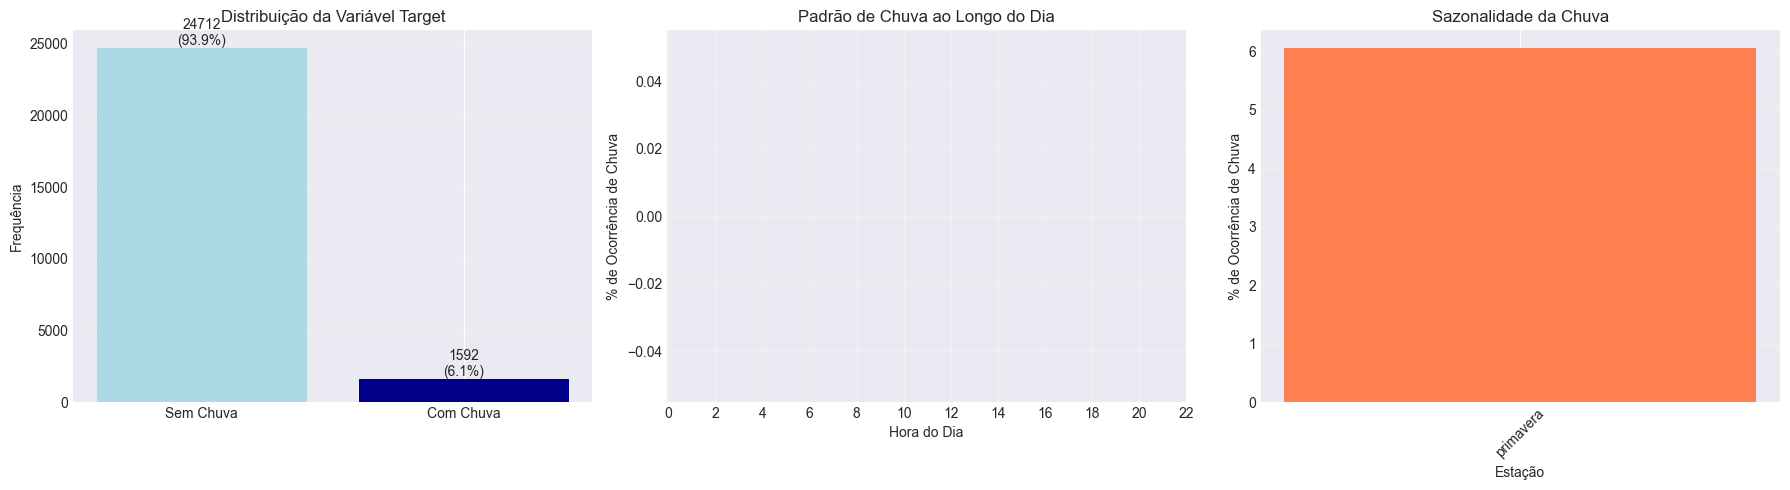


📊 Estatísticas da Variável Target:
   Total de eventos de chuva: 1592
   Taxa de chuva: 6.05%
   Balanceamento: 93.9% / 6.1%


In [14]:
# 9. Análise da Variável Target (Chuva)

if 'Chuva' in df_processed.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Distribuição geral
    chuva_counts = df_processed['Chuva'].value_counts()
    axes[0].bar(['Sem Chuva', 'Com Chuva'], chuva_counts.values, color=['lightblue', 'darkblue'])
    axes[0].set_ylabel('Frequência')
    axes[0].set_title('Distribuição da Variável Target')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Adicionar percentuais
    for i, v in enumerate(chuva_counts.values):
        pct = (v / chuva_counts.sum()) * 100
        axes[0].text(i, v, f'{v}\n({pct:.1f}%)', ha='center', va='bottom')
    
    # 2. Chuva por hora do dia
    chuva_por_hora = df_processed.groupby('hora')['Chuva'].mean() * 100
    axes[1].plot(chuva_por_hora.index, chuva_por_hora.values, marker='o', linewidth=2, color='steelblue')
    axes[1].set_xlabel('Hora do Dia')
    axes[1].set_ylabel('% de Ocorrência de Chuva')
    axes[1].set_title('Padrão de Chuva ao Longo do Dia')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xticks(range(0, 24, 2))
    
    # 3. Chuva por estação
    chuva_por_estacao = df_processed.groupby('estacao')['Chuva'].mean() * 100
    axes[2].bar(chuva_por_estacao.index, chuva_por_estacao.values, color='coral')
    axes[2].set_xlabel('Estação')
    axes[2].set_ylabel('% de Ocorrência de Chuva')
    axes[2].set_title('Sazonalidade da Chuva')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas detalhadas
    print("\n📊 Estatísticas da Variável Target:")
    print(f"   Total de eventos de chuva: {df_processed['Chuva'].sum()}")
    print(f"   Taxa de chuva: {df_processed['Chuva'].mean()*100:.2f}%")
    print(f"   Balanceamento: {(1 - df_processed['Chuva'].mean())*100:.1f}% / {df_processed['Chuva'].mean()*100:.1f}%")


In [15]:
# 10. Salvar Dados Processados

# Salvar dataset básico
output_path_basic = "../data/dados_processados_ml.csv"
df_processed.to_csv(output_path_basic, index=False, encoding='utf-8')
print(f"💾 Dataset básico salvo: {output_path_basic}")
print(f"   Dimensões: {df_processed.shape}")

# Salvar dataset avançado (com lags e rolling)
output_path_advanced = "../data/dados_processados_ml_advanced.csv"
df_processed_advanced.to_csv(output_path_advanced, index=False, encoding='utf-8')
print(f"\n💾 Dataset avançado salvo: {output_path_advanced}")
print(f"   Dimensões: {df_processed_advanced.shape}")

# Criar resumo das features
output_info = "../data/features_summary.txt"
with open(output_info, 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("RESUMO DAS FEATURES CRIADAS PELO PIPELINE\n")
    f.write("=" * 80 + "\n\n")
    
    f.write(f"Dataset Básico:\n")
    f.write(f"  - Registros: {len(df_processed)}\n")
    f.write(f"  - Features: {len(df_processed.columns)}\n\n")
    
    f.write(f"Dataset Avançado:\n")
    f.write(f"  - Registros: {len(df_processed_advanced)}\n")
    f.write(f"  - Features: {len(df_processed_advanced.columns)}\n\n")
    
    f.write("Features Temporais:\n")
    for feat in sorted(features_temporais):
        f.write(f"  - {feat}\n")
    
    f.write("\nFeatures Meteorológicas:\n")
    for feat in sorted(features_meteorologicas):
        f.write(f"  - {feat}\n")

print(f"\n📄 Resumo salvo: {output_info}")

💾 Dataset básico salvo: ../data/dados_processados_ml.csv
   Dimensões: (26304, 41)

💾 Dataset avançado salvo: ../data/dados_processados_ml_advanced.csv
   Dimensões: (0, 62)

📄 Resumo salvo: ../data/features_summary.txt
